In [1]:
from nltk.tokenize import sent_tokenize as st
from nltk.tokenize import regexp_tokenize as rt
from nltk.tokenize import TweetTokenizer as tt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import plotly.graph_objects as go

#https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
#https://towardsdatascience.com/natural-language-processing-for-consumer-satisfaction-in-python-e2b6d473efd1


### From DataCamp
#### Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

#### Tokenize and print only capital words
capital_words = r"[A-Z|\U000000DC]\w+"
print(regexp_tokenize(german_text, capital_words))

##### Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

In [2]:
from nltk.tokenize import regexp_tokenize


In [3]:
def getAmenitiesTokens(cell_val):
    return regexp_tokenize(cell_val, "([\w\s\d\']+), ")


In [4]:
amenities_df = pd.read_csv(r"data/listings_onlyamenities.csv")

In [5]:
pd.options.display.max_colwidth = 1000
amenities_df[['id', 'amenities']]

,id,amenities
0,2318,"[""Children\u2019s books and toys"", ""Iron"", ""Hangers"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Luggage dropoff allowed"", ""Microwave"", ""Dishwasher"", ""Wifi"", ""Smoke alarm"", ""Refrigerator"", ""Kitchen"", ""Indoor fireplace"", ""Washer"", ""Dishes and silverware"", ""Stove"", ""Coffee maker"", ""Free street parking"", ""Cooking basics"", ""Shampoo"", ""Host greets you"", ""Laptop-friendly workspace"", ""Free parking on premises"", ""Oven"", ""First aid kit"", ""Hot water"", ""Fire extinguisher"", ""Garden or backyard"", ""Dryer"", ""High chair"", ""Long term stays allowed"", ""Patio or balcony"", ""Heating"", ""Pack \u2019n Play/travel crib"", ""Essentials"", ""Lake access""]"
1,9419,"[""Iron"", ""Hangers"", ""Lock on bedroom door"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Air conditioning"", ""Microwave"", ""Wifi"", ""Smoke alarm"", ""Extra pillows and blankets"", ""Refrigerator"", ""Kitchen"", ""Washer"", ""Private living room"", ""Dishes and silverware"", ""Stove"", ""Coffee maker"", ""Free street parking"", ""Cooking basics"", ""Shampoo"", ""Host greets you"", ""Laptop-friendly workspace"", ""Bed linens"", ""Free parking on premises"", ""Oven"", ""First aid kit"", ""Hot water"", ""Fire extinguisher"", ""Dryer"", ""Long term stays allowed"", ""Patio or balcony"", ""Heating"", ""Essentials""]"
2,9531,"[""Iron"", ""TV"", ""Hangers"", ""Cable TV"", ""Private entrance"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Barbecue utensils"", ""Luggage dropoff allowed"", ""Microwave"", ""Dishwasher"", ""Wifi"", ""Smoke alarm"", ""Extra pillows and blankets"", ""Refrigerator"", ""Kitchen"", ""Indoor fireplace"", ""Washer"", ""Dishes and silverware"", ""Single level home"", ""Ethernet connection"", ""Stove"", ""Coffee maker"", ""Free street parking"", ""Cooking basics"", ""BBQ grill"", ""Shampoo"", ""Laptop-friendly workspace"", ""Bed linens"", ""Free parking on premises"", ""Oven"", ""First aid kit"", ""Hot water"", ""Fire extinguisher"", ""Garden or backyard"", ""Dryer"", ""Long term stays allowed"", ""Patio or balcony"", ""Heating"", ""Shower gel"", ""Essentials"", ""Baking sheet""]"
3,9534,"[""Conditioner"", ""Iron"", ""TV"", ""Hangers"", ""Cable TV"", ""Private entrance"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Barbecue utensils"", ""Luggage dropoff allowed"", ""Microwave"", ""Wifi"", ""Smoke alarm"", ""Extra pillows and blankets"", ""Refrigerator"", ""Kitchen"", ""Indoor fireplace"", ""Washer"", ""Dishes and silverware"", ""Single level home"", ""Ethernet connection"", ""Stove"", ""Coffee maker"", ""Free street parking"", ""Cooking basics"", ""BBQ grill"", ""Shampoo"", ""Laptop-friendly workspace"", ""Bed linens"", ""Free parking on premises"", ""Freezer"", ""Portable fans"", ""Oven"", ""First aid kit"", ""Hot water"", ""Fire extinguisher"", ""Garden or backyard"", ""Dryer"", ""Long term stays allowed"", ""Body soap"", ""Patio or balcony"", ""Heating"", ""Shower gel"", ""Essentials"", ""Pour Over Coffee"", ""Baking sheet""]"
4,9596,"[""Iron"", ""TV"", ""Hangers"", ""Cable TV"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Microwave"", ""Dishwasher"", ""Wifi"", ""Smoke alarm"", ""Refrigerator"", ""Kitchen"", ""Dishes and silverware"", ""Stove"", ""Coffee maker"", ""Free street parking"", ""Cooking basics"", ""BBQ grill"", ""Shampoo"", ""Laptop-friendly workspace"", ""Oven"", ""Fire extinguisher"", ""Smart lock"", ""Garden or backyard"", ""Patio or balcony"", ""Heating"", ""Essentials""]"
...,...,...
4330,46036925,"[""Hot water"", ""Wifi"", ""Shampoo"", ""Smoke alarm"", ""Fire extinguisher"", ""Laptop-friendly workspace"", ""Kitchen"", ""Hangers"", ""Heating"", ""Lock on bedroom door"", ""Essentials"", ""Lockbox"", ""Hair dryer"", ""Free parking on premises""]"
4331,46037073,"[""Hot water"", ""Wifi"", ""Shampoo"", ""Fire extinguisher"", ""Smoke alarm"", ""Laptop-friendly workspace"", ""Kitchen"", ""Hangers"", ""Heating"", ""Lock on bedroom door"", ""Essentials"", ""Lockbox"", ""Hair d

In [6]:
amenities_df['amenities'] = amenities_df['amenities'].replace({'\[': '', '\]': '', '"':'', r'\\u2019': r"'", r"\\u2013":"-", r"\\u00a0":""}, regex=True)
amenities_df['amenities'] = amenities_df['amenities'].str.lower()
amenities_df["amenities_tokens"] = amenities_df["amenities"].apply(getAmenitiesTokens )

In [7]:
amenities_df['found_love'] =  amenities_df["amenities"].apply(lambda x: "love" in x)

In [13]:
from nltk import FreqDist

In [14]:
def addToTokenFreqDist(cell_value, tokenDist):
    tokenDist  = tokenDist.update(cell_value)
            
tokenDist = FreqDist()
amenities_df ['amenities_tokens'].apply(addToTokenFreqDist, args=(tokenDist, )) 


0       None
1       None
2       None
3       None
4       None
        ... 
4330    None
4331    None
4332    None
4333    None
4334    None
Name: amenities_tokens, Length: 4335, dtype: object

In [15]:
tokenDist_df = pd.DataFrame.from_dict(tokenDist, orient='index')
tokenDist_df = tokenDist_df.reset_index()
tokenDist_df.columns=['amenity_token', 'freq']


In [16]:
#Convert some of 
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('refrigerator'),'amenity_token'] = "refrigerator"
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('mini fridge'),'amenity_token'] = "mini fridge"


tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('electric stove'),'amenity_token'] = 'electric stove'
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('induction stove'),'amenity_token'] = 'induction stove'
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('gas stove'),'amenity_token'] = 'gas stove'
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('stove'),'amenity_token'] = 'stove'

tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('tv'),'amenity_token'] = 'tv'


tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('electric oven'),'amenity_token'] = 'electric oven'
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('gas oven'),'amenity_token'] = 'gas oven'
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('induction oven'),'amenity_token'] = 'induction oven'
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('oven'),'amenity_token'] = 'oven'


tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('shampoo'),'amenity_token'] = 'shampoo'
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('conditioner'),'amenity_token'] = 'conditioner'
tokenDist_df.loc[(tokenDist_df['amenity_token'].str.contains('body soap')) | (tokenDist_df['amenity_token'].str.contains('body wash')) ,'amenity_token'] = 'body soap'
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('soap'),'amenity_token'] = 'soap'


tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('paid parking'),'amenity_token'] = 'paid parking'
tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('free parking'),'amenity_token'] = 'free parking'

tokenDist_df.loc[(tokenDist_df['amenity_token'].str.contains('paid')) & ((tokenDist_df['amenity_token'].str.contains('parking')) | (tokenDist_df['amenity_token'].str.contains('carport')) ) ,'amenity_token'] = 'paid parking'
tokenDist_df.loc[(tokenDist_df['amenity_token'].str.contains('free')) & ((tokenDist_df['amenity_token'].str.contains('parking')) | (tokenDist_df['amenity_token'].str.contains('carport')) ) ,'amenity_token'] = 'free parking'


tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('sound system'),'amenity_token'] = 'sound system'

tokenDist_df.loc[tokenDist_df['amenity_token'].str.contains('hot tub'),'amenity_token'] = 'hot tub'


In [21]:
# combine the change amenities together
tokenDist_df = tokenDist_df.groupby(['amenity_token']).agg(freq=('freq', 'sum'))
tokenDist_df = tokenDist_df.sort_values(by="freq", ascending=False)

In [35]:
#create slider for this number of top Limit slider to 10 min and 50 max
pd.options.display.max_rows = 590
top_tokenDist_df = tokenDist_df.iloc[:50].copy().reset_index()
top_tokenDist_df['amenity_token'] = top_tokenDist_df['amenity_token'].apply(lambda x : x.capitalize())

0                             Tv
1                   Free parking
2                           Wifi
3                    Smoke alarm
4                        Heating
5                        Shampoo
6                     Hair dryer
7                        Hangers
8                           Iron
9          Carbon monoxide alarm
10                       Kitchen
11            Friendly workspace
12                        Washer
13                         Dryer
14                     Hot water
15         Dishes and silverware
16                  Refrigerator
17                  Coffee maker
18                     Microwave
19             Fire extinguisher
20                Cooking basics
21                    Bed linens
22                         Stove
23                          Oven
24              Private entrance
25    Extra pillows and blankets
26                    Essentials
27       Long term stays allowed
28                    Dishwasher
29                 First aid kit
30        

In [36]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=top_tokenDist_df.amenity_token, y=top_tokenDist_df.freq)])
fig.show()

In [38]:
import numpy as np
amenities_mask = np.array(Image.open("assets/WordCloudMask.png"))



In [41]:
dict(zip(top_tokenDist_df['amenity_token'], top_tokenDist_df['freq']))

{'Tv': 4768,
 'Free parking': 4306,
 'Wifi': 4266,
 'Smoke alarm': 4245,
 'Heating': 3911,
 'Shampoo': 3911,
 'Hair dryer': 3902,
 'Hangers': 3876,
 'Iron': 3789,
 'Carbon monoxide alarm': 3765,
 'Kitchen': 3751,
 'Friendly workspace': 3561,
 'Washer': 3402,
 'Dryer': 3389,
 'Hot water': 3336,
 'Dishes and silverware': 3204,
 'Refrigerator': 3174,
 'Coffee maker': 3079,
 'Microwave': 3038,
 'Fire extinguisher': 2895,
 'Cooking basics': 2681,
 'Bed linens': 2601,
 'Stove': 2586,
 'Oven': 2549,
 'Private entrance': 2535,
 'Extra pillows and blankets': 2200,
 'Essentials': 2151,
 'Long term stays allowed': 2017,
 'Dishwasher': 1871,
 'First aid kit': 1815,
 'Patio or balcony': 1746,
 'Garden or backyard': 1383,
 'Air conditioning': 1347,
 'Luggage dropoff allowed': 1173,
 'Keypad': 1073,
 'Bbq grill': 995,
 'Gym': 925,
 'Bathtub': 903,
 'Indoor fireplace': 820,
 'Elevator': 772,
 'Shower gel': 666,
 'Paid parking': 624,
 'Travel crib': 611,
 'Lock on bedroom door': 458,
 'Single level hom

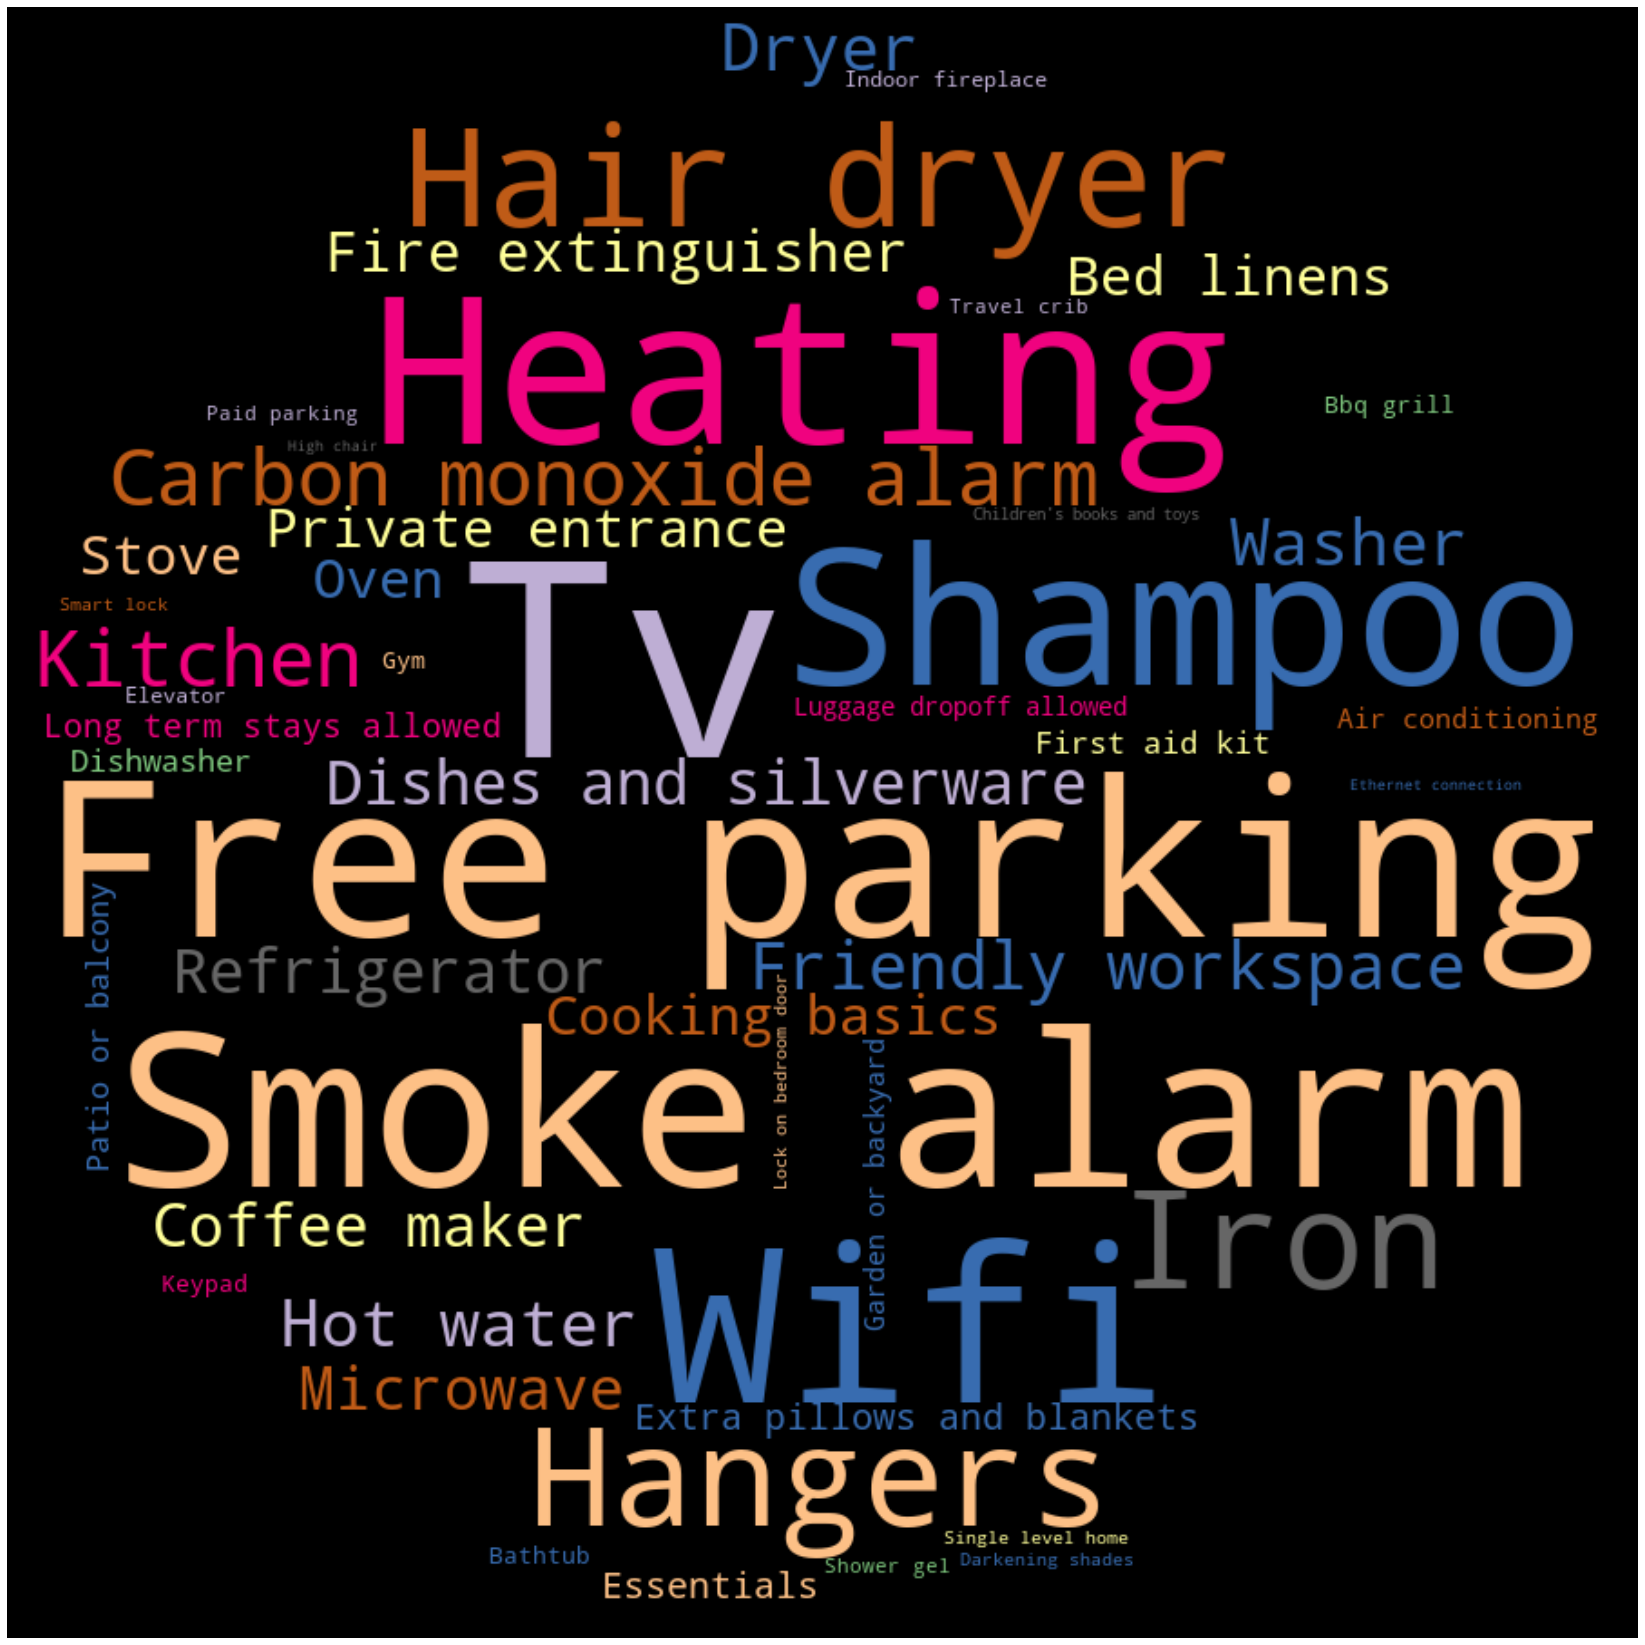

In [42]:
wc = WordCloud(colormap = "Accent", background_color="black", mask=amenities_mask)
        
wc.generate_from_frequencies(dict(zip(top_tokenDist_df['amenity_token'], top_tokenDist_df['freq'])))
wc.to_file("assets/amenities_all.png")
fig, ax = plt.subplots(1, 1, figsize = (30, 30))
plt.imshow(wc, interpolation="bilinear")
plt.axis(False)
plt.show()  

In [ ]:
wc = WordCloud(colormap = "Accent", background_color="black", mask=amenities_mask)
tokenDict_sorted = sorted(tokenDict, key=tokenDict.get, reverse=True)
sorted_tokendict = {}
for key in tokenDict_sorted:
    #Only pick amenities whose value is greater than 200
    value =  tokenDict[key]
    if value >= 200:

        sorted_tokendict[key] = value
        
wc.generate_from_frequencies(sorted_tokendict)
wc.to_file("assets/amenities_all.png")
fig, ax = plt.subplots(1, 1, figsize = (30, 30))
plt.imshow(wc, interpolation="bilinear")
plt.axis(False)
plt.show()        

In [ ]:
amenities_mask

In [ ]:
sorted_tokendict

In [ ]:
amenities_df ['amenities_tokens'][0]

In [ ]:
from wordcloud import WordCloud
import base64
from io import BytesIO

di = {'abc':10, 'def': 20, 'ghi':2, 'jkl':55}
wc = WordCloud().generate_from_frequencies(frequencies=di)
wc_img = wc.to_image()
with BytesIO() as buffer:
    wc_img.save(buffer, 'png')
    img2 = base64.b64encode(buffer.getvalue()).decode()

app.layout = html.Div(children=[
                    html.Img(src="data:image/png;base64," + img2)
                ])      